# Binance Assignment

The Give Me Some Credit dataset from Kaggle will be thoroughly analyzed and visualized below through EDA Analysis. I plan to first do some elementary data pre-processing followed by an in-depth EDA Analysis on each column in the dataset. Relationships between relevant variables will be determined and possible explanations for the findings will be provided.

In [1]:
import pandas as pd
import numpy as np

import os
import random

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

import operator
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

Mounted at /content/drive


In [2]:
df_train = pd.read_csv(r'/content/drive/MyDrive/GiveMeSomeCredit/cs-training.csv', index_col=[0])
df_test = pd.read_csv(r'/content/drive/MyDrive/GiveMeSomeCredit/cs-test.csv', index_col=[0])
df = pd.concat([df_train, df_test])
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1.0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0.0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0.0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0.0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0.0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# Data Preprocessing

We will now conduct some elementary data preprocessing by checking for duplicates and null-values, and exploring the type of data we have.

In [9]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,251503.000000,251503.000000,251503.000000,251503.000000,2.016690e+05,251503.000000,251503.000000,251503.000000,251503.000000,244953.000000
mean,0.066840,5.750415,52.339694,0.434245,349.562468,6.744818e+03,8.453064,0.278370,1.016155,0.252466,0.761995
std,0.249746,229.633980,14.775120,4.335643,1884.792016,2.571761e+04,5.145194,4.312539,1.121935,4.299204,1.123905
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029977,41.000000,0.000000,0.174330,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.153575,52.000000,0.000000,0.365612,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.561293,63.000000,0.000000,0.861754,8.212000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,7.727000e+06,85.000000,98.000000,54.000000,98.000000,43.000000


In [10]:
df.info()
print()
print('Shape:', df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251503 entries, 1 to 101503
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  251503 non-null  float64
 2   age                                   251503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  251503 non-null  int64  
 4   DebtRatio                             251503 non-null  float64
 5   MonthlyIncome                         201669 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       251503 non-null  int64  
 7   NumberOfTimes90DaysLate               251503 non-null  int64  
 8   NumberRealEstateLoansOrLines          251503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  251503 non-null  int64  
 10  NumberOfDependents                    244953 non-null  float64
dtype

In [11]:
df.nunique(axis=0)

SeriousDlqin2yrs                             2
RevolvingUtilizationOfUnsecuredLines    208075
age                                         88
NumberOfTime30-59DaysPastDueNotWorse        17
DebtRatio                               182595
MonthlyIncome                            15757
NumberOfOpenCreditLinesAndLoans             60
NumberOfTimes90DaysLate                     21
NumberRealEstateLoansOrLines                29
NumberOfTime60-89DaysPastDueNotWorse        13
NumberOfDependents                          14
dtype: int64

In [12]:
df.isna().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            49834
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        6550
dtype: int64

## Handling Missing Values

In [13]:
def check_missing_data(df):
    missing_data = pd.DataFrame(df.isna().sum().sort_values())
    missing_data.columns=['Count']
    missing_data = missing_data[missing_data.Count != 0]       
    missing_data['Missing_Percentage'] = missing_data.Count/df.shape[0]*100
    print(missing_data)
    try :
        missing_data.Missing_Percentage.plot(kind='bar',figsize=(10,6))
    except:
        print('There is no missing data!')

                     Count  Missing_Percentage
NumberOfDependents    6550            2.604343
MonthlyIncome        49834           19.814475
SeriousDlqin2yrs    101503           40.358564


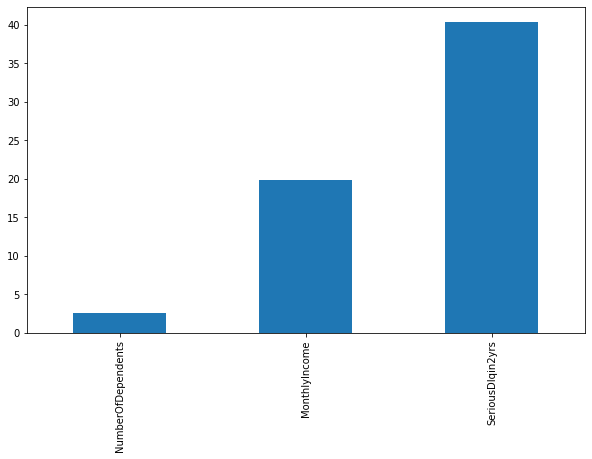

In [14]:
check_missing_data(df)

# EDA Analysis

Let us begin the EDA Analysis. Part 1 of this assignment requires us to investigate the relationship between the variables in the dataset. Let us first begin by investigating the skewness of each variable in the dataset, to get an idea of the type and range of data we'll be dealing with for each variable.

Skewness of the variables: 
 SeriousDlqin2yrs                          3.468857
RevolvingUtilizationOfUnsecuredLines     89.588082
age                                       0.188216
NumberOfTime30-59DaysPastDueNotWorse     21.883195
DebtRatio                                90.927291
MonthlyIncome                           195.756274
NumberOfOpenCreditLinesAndLoans           1.219306
NumberOfTimes90DaysLate                  22.339617
NumberRealEstateLoansOrLines              3.212139
NumberOfTime60-89DaysPastDueNotWorse     22.557289
NumberOfDependents                        1.792373
dtype: float64


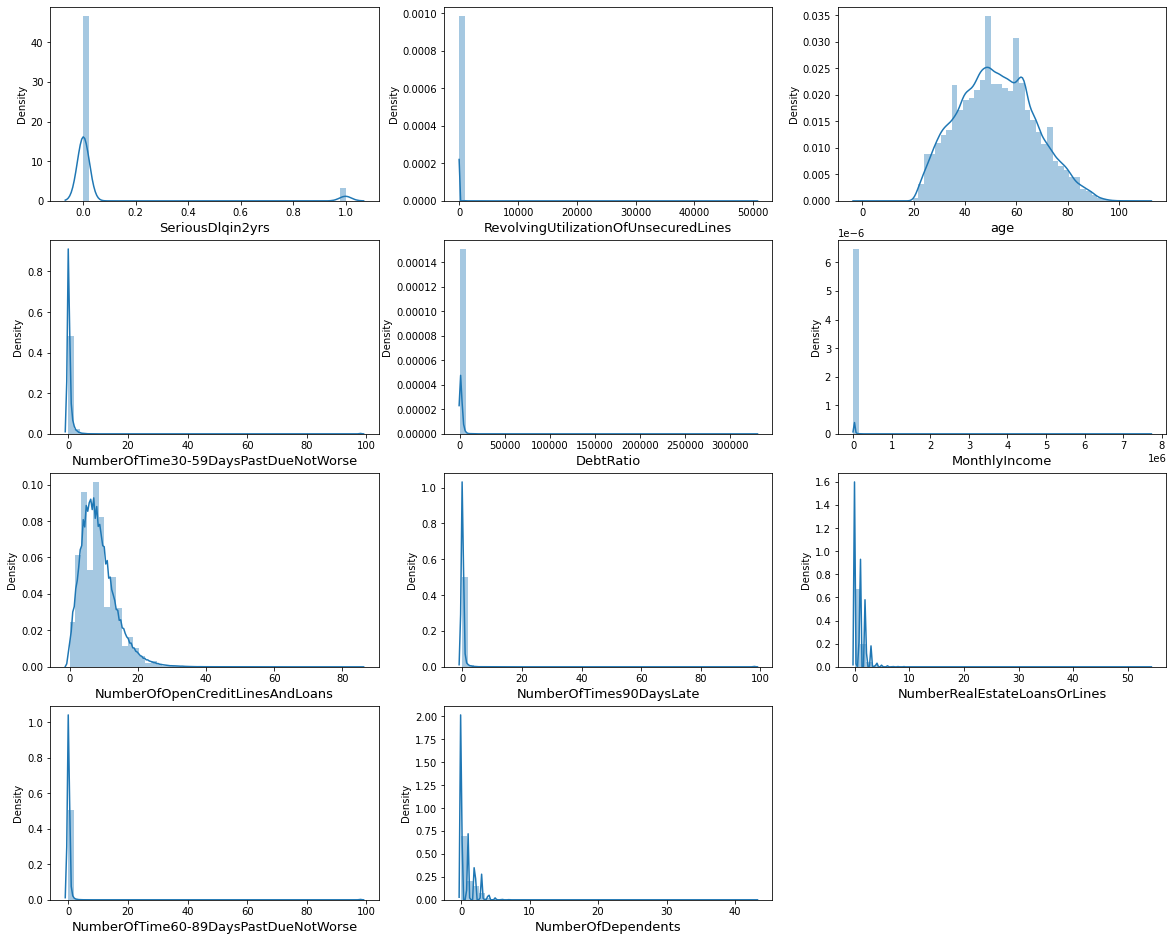

In [15]:
plt.figure(figsize=(20,25))
plot_num=1
for col in df.columns:
    ax=plt.subplot(6,3,plot_num)
    sns.distplot(df[col])
    plt.xlabel(col,fontsize=13)
    plot_num+=1

print('Skewness of the variables: \n', df.skew())

For the following individual column analysis, we will define the bivariate plot function, which will help us compare more than 2 columns with one another and derive relationship(s).

In [16]:
def biv_plot(a, b, c):
    biv_table = df.pivot_table(
        columns=a,
        index=b,
        values=c, aggfunc=np.sum)
    biv_table.sort_values(by=[b], ascending=True).plot(kind="bar", title=(b), figsize=(6,4),fontsize = 12);

## Serious Delinquency in 2 Years

We shall now begin individually investigating the variables and their relationship with the other variables in the dataset. We begin with the SeriousDlqin2yrs variable, denoting the number of people in the population who have defaulted.

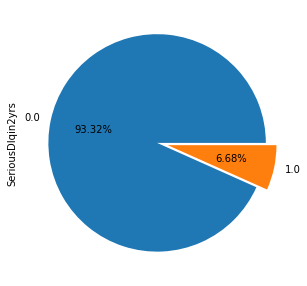

In [17]:
plt.figure(figsize = (7,5))
df['SeriousDlqin2yrs'].value_counts().plot(kind="pie",autopct="%.2f%%",explode=[0,0.1])
plt.show()

From the above pie chart, we can see that roughly 6.68% of the samples have defaulted. 

We'll now take a look at the relationship between SeriousDlqin2yrs and age, which will reveal the defaulting trends by age.

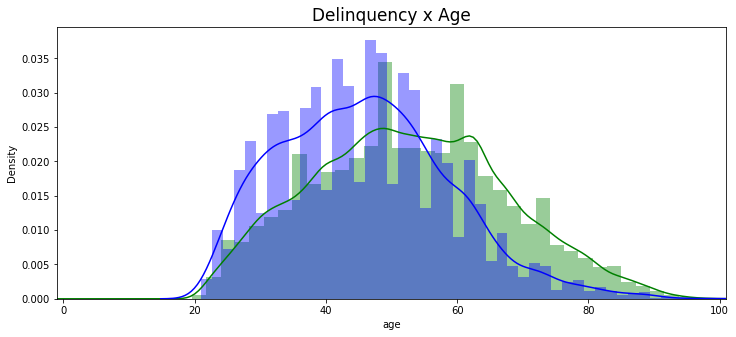

In [18]:
plt.figure(figsize=(12,5))
sns.distplot(df[df['SeriousDlqin2yrs'] == 0]["age"], 
             color='g')
sns.distplot(df[df['SeriousDlqin2yrs'] == 1]["age"], 
             color='b')
plt.title('Delinquency x Age', fontsize=17)
plt.xlim([-1,101])
plt.show()

The green line represents the trend line for the non-delinquent clients while the blue line represents the trend line for the delinquent clients. 

The green line seems fairly steady. The trend line resembles the distribution plot's trend line, which makes sense since most of the population are non-delinquent. There is not much to read into here.

The blue line steadily increases right off the bat and peaks fairly early, at around 50. There is then a steady decrease until around 100. This indicates that the younger people are defaulting more than the older people, which could also be contributed to the larger sample size for the younger age group compared to the older age group, as revealed in the distribution plot in the beginning of our EDA analysis. However it could also indicate that older people are more punctual with their repayments.

We will continue to investigate the SeriousDlqin2yrs and age variables throughout this assignment. Both variables are going to be key to determine how various factors influence loan defaulting.

## Number of Open Credit Lines and Loans

We will now investigate the Number of Open Credit Lines and Loans variable. We will begin by constructing a scatter plot between age and the number of open credit lines and loans to examine whether the probability of loan default is impacted more by age or more by feeling financially overwhelmed by multiple lines/loans.

In [22]:
df['NumberOfOpenCreditLinesAndLoans'].value_counts().sort_index()

0      3138
1      7485
2     11123
3     15226
4     19388
5     21658
6     22831
7     22353
8     21031
9     18892
10    16345
11    13988
12    11713
13     9451
14     7625
15     6135
16     4984
17     3938
18     3155
19     2439
20     1926
21     1454
22     1121
23      905
24      702
25      556
26      430
27      312
28      249
29      184
30      142
31      132
32       99
33       92
34       58
35       44
36       32
37       15
38       26
39       13
40       17
41        8
42       12
43       11
44        8
45       14
46        4
47        4
48        7
49        5
50        2
51        3
52        4
53        2
54        4
56        2
57        2
58        2
63        1
85        1
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64

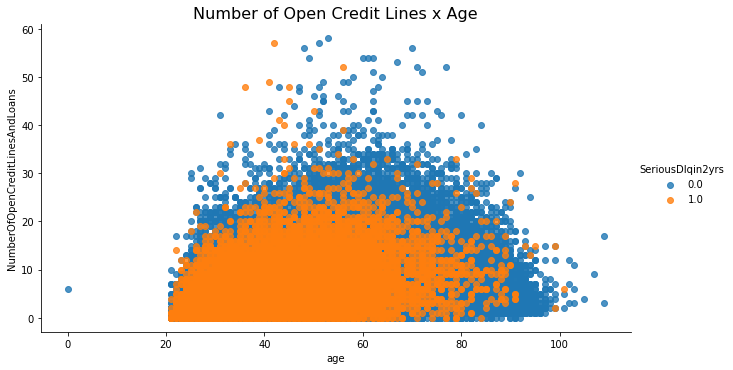

In [19]:
ax = sns.lmplot(y="NumberOfOpenCreditLinesAndLoans", x="age", fit_reg=False,aspect=1.8,
                data=df, hue='SeriousDlqin2yrs')
plt.title("Number of Open Credit Lines x Age",fontsize=16)
plt.show()

This plot is quite fascinating. Younger members on average seem to have fewer open credit lines/loans. Middle aged members seem to have more open credit lines/loans, but on average seem to be less delinquent as well. Younger members appear more delinquent despite having fewer open credit lines/loans, which might be a result of lower salaries, weaker finances, and larger loans such as student loans, all of which may be playing a part here. 

We will now examine the relationship between the Number of open credit lines/loans and delinquency.

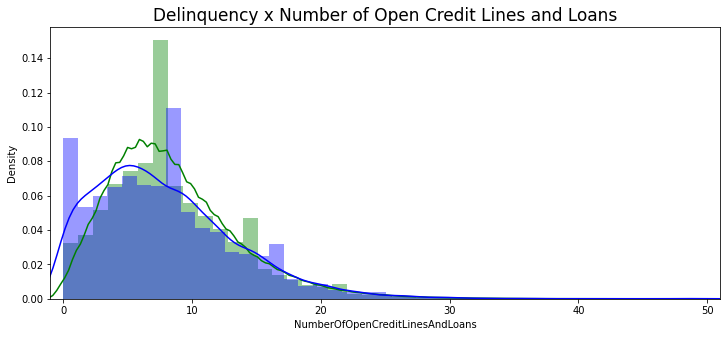

In [20]:
plt.figure(figsize=(12,5))
sns.distplot(df[df['SeriousDlqin2yrs'] == 0]["NumberOfOpenCreditLinesAndLoans"], 
             color='g')
sns.distplot(df[df['SeriousDlqin2yrs'] == 1]["NumberOfOpenCreditLinesAndLoans"], 
             color='b')
plt.title('Delinquency x Number of Open Credit Lines and Loans', fontsize=17)
plt.xlim([-1,51])
plt.show()

The blue line denoting the trend for number of open credit lines and loans for delinquent members peaks at roughly 8. Members who open 8 such lines/loans are the ones most likely to default. Members who open more seem to be more financially stable or more on hands with repayment, while those who open less are naturally under a lesser burden to repay the open lines and loans, though this is subjective on the amount borrowed.

## Number Of Real Estate Loans or Lines

In [21]:
df['NumberRealEstateLoansOrLines'].value_counts().sort_index()

0     94254
1     88008
2     52477
3     10723
4      3584
5      1141
6       547
7       279
8       151
9       127
10       60
11       42
12       29
13       20
14       16
15       11
16        6
17        4
18        3
19        4
20        3
21        2
23        2
25        4
26        1
29        2
32        1
37        1
54        1
Name: NumberRealEstateLoansOrLines, dtype: int64

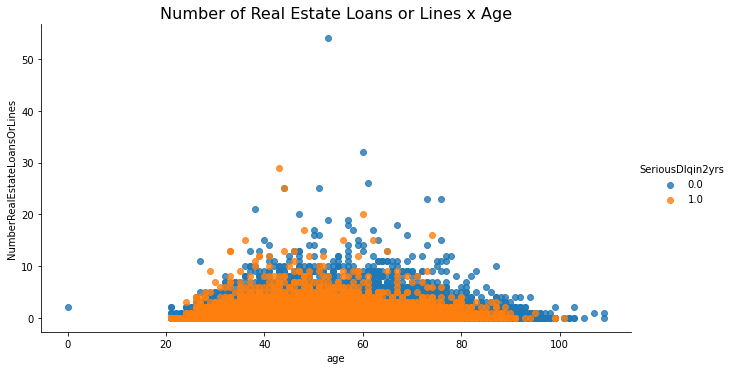

In [23]:
ax = sns.lmplot(y="NumberRealEstateLoansOrLines", x="age", fit_reg=False,aspect=1.8,
                data=df, hue='SeriousDlqin2yrs')
plt.title("Number of Real Estate Loans or Lines x Age",fontsize=16)
plt.show()

Similar to the previous column we investigated, we see that the youngest and oldest people in the population have far fewer real estate loans/lines compared to the middle-aged population. We also see that the younger people appear more delinquent despite having fewer real estate loans/lines and the middle aged people who have fewer real estate loans/lines also appear more delinquent than those with more open loans/lines. This could be because those who have the ability to open more of these real estate loans/lines are more financially capable to repay them on time, compared to those financially capable of only opening a few loans/lines.

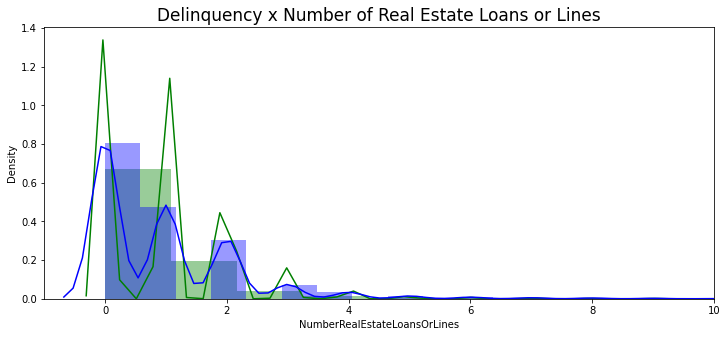

In [24]:
plt.figure(figsize=(12,5))
sns.distplot(df[df['SeriousDlqin2yrs'] == 0]["NumberRealEstateLoansOrLines"], 
             color='g')
sns.distplot(df[df['SeriousDlqin2yrs'] == 1]["NumberRealEstateLoansOrLines"], 
             color='b')
plt.title('Delinquency x Number of Real Estate Loans or Lines', fontsize=17)
plt.xlim([-1,10])
plt.show()

We see that the delinquent members, represented in blue, have clearly got less real estate loans or lines open. As explained earlier, this could be contributed to their incapability to open such lines/loans because they did not possess the required assets, making them less financially capable to repay the few lines/loans they did open.

## Number of Dependents

In [43]:
df['NumberOfOpenCreditLinesAndLoans'].describe()

count    251503.000000
mean          8.453064
std           5.145194
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          85.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

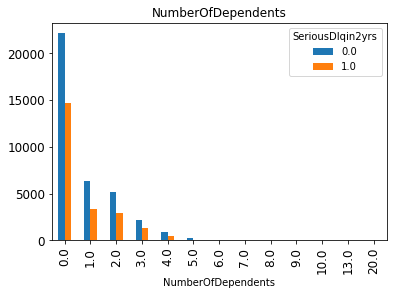

In [ ]:
biv_plot('SeriousDlqin2yrs', 'NumberOfDependents', 'NumberOfTime30-59DaysPastDueNotWorse')

This plot displays the relationship between dependents and number of times someone was 1-2 months late in payment. We see that the most defaults accompany members with fewer dependents, but there is also a smaller sample size for the members with a higher number of dependents.

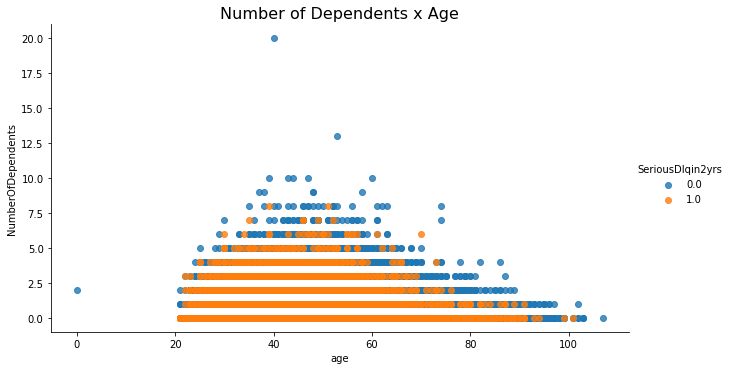

In [26]:
ax = sns.lmplot(y="NumberOfDependents", x="age", fit_reg=False,aspect=1.8,
                data=df, hue='SeriousDlqin2yrs')
plt.title("Number of Dependents x Age",fontsize=16)
plt.show()

From the graph, it is evident that the youngest and oldest members of the population do not have as many dependents as the rest of the population. We also see that the more dependents the member has, the less the likelihood of defaulting (with the larger sea of blue in the upper lines). This is further visible in the graph below.

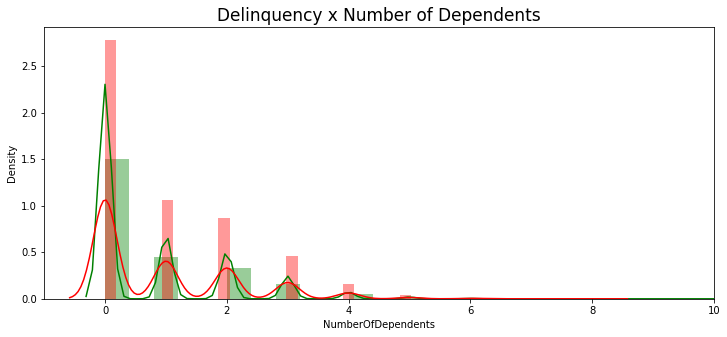

In [27]:
plt.figure(figsize=(12,5))
sns.distplot(df[df['SeriousDlqin2yrs'] == 0]["NumberOfDependents"], 
             color='g')
sns.distplot(df[df['SeriousDlqin2yrs'] == 1]["NumberOfDependents"], 
             color='r')
plt.title('Delinquency x Number of Dependents', fontsize=17)
plt.xlim([-1,10])
plt.show()

The larger the number of dependents, the lower the chance of defaulting. We see the red line peak at 0 and simmer down eventually, signalling that the most defaults come with the members with no dependents. Though this might mean more expense at the hands of the member, it also means that they're likely more responsible with their repayments as it affects more than just them.

## Late Payment Analysis

We know that there are 3 specific late payment columns, namely the NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTimes90DaysLate columns. Let us individually analyze these columns to understand the trends and explore how often members repay their loans late. 

Let's first look at the 30-59 day late payment column. Let us get an idea of the type of values we're dealing with and then plot visualizations against other variables to evaluate the relationship.

In [28]:
df_train["NumberOfTime30-59DaysPastDueNotWorse"].value_counts().sort_index()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       264
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [29]:
df_train["NumberOfTime60-89DaysPastDueNotWorse"].value_counts().sort_index()

0     142396
1       5731
2       1118
3        318
4        105
5         34
6         16
7          9
8          2
9          1
11         1
96         5
98       264
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [30]:
df_train["NumberOfTimes90DaysLate"].value_counts().sort_index()

0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: NumberOfTimes90DaysLate, dtype: int64

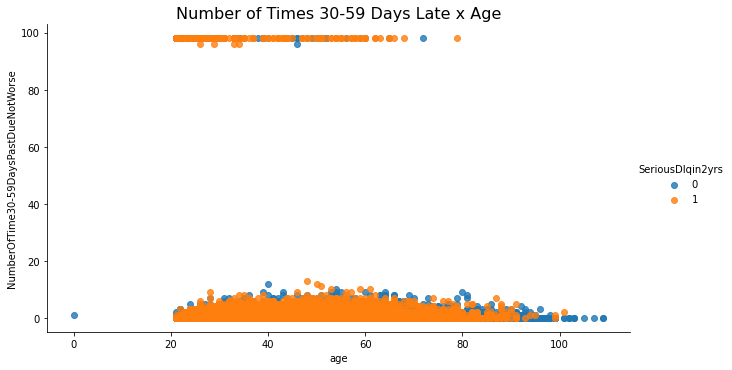

In [31]:
ax = sns.lmplot(y="NumberOfTime30-59DaysPastDueNotWorse", x="age", fit_reg=False,aspect=1.8,
                data=df_train, hue='SeriousDlqin2yrs')
plt.title("Number of Times 30-59 Days Late x Age",fontsize=16)
plt.show()

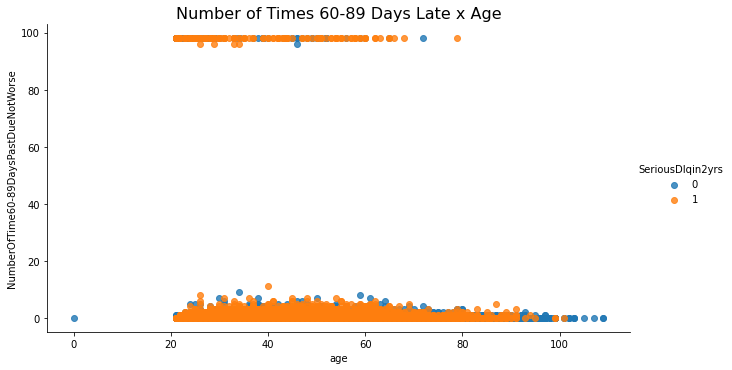

In [32]:
ax = sns.lmplot(y="NumberOfTime60-89DaysPastDueNotWorse", x="age", fit_reg=False,aspect=1.8,
                data=df_train, hue='SeriousDlqin2yrs')
plt.title("Number of Times 60-89 Days Late x Age",fontsize=16)
plt.show()

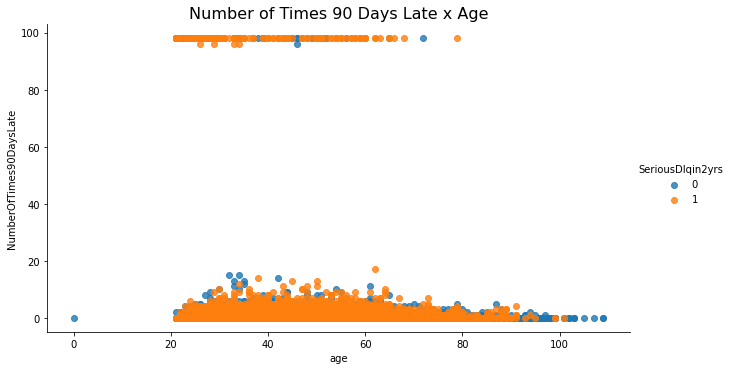

In [33]:
ax = sns.lmplot(y="NumberOfTimes90DaysLate", x="age", fit_reg=False,aspect=1.8,
                data=df_train, hue='SeriousDlqin2yrs')
plt.title("Number of Times 90 Days Late x Age",fontsize=16)
plt.show()

These are a very interesting set of plots. We see that, in all 3 graphs, the majority of members are situated right at the bottom, above 0 and below 20, and the rest of the members are situated above 96. More specifically, when we look at the value counts, we see that for graph 1 we have the majority of clients located between 0 and 13, for graph 2 we have the majority of clients located between 0 and 11, and for graph 3 we have the majority of clients located between 0 and 17. For each graph we have exactly 269 clients located over 96. 

What does this tell us? There are most likely the same 269 members that are always late. They are consistently more than 90 days late and seem to have got into the habit of repaying late, and hence the same 269 reflect on the other 2 late graphs as well. The rest of the members are occasionally late but have most likely been punctual with the rest of their payments. There are 2 extremes of members then: Those who are always late and those who are rarely late. This might reveal a little about the general financial habits of members in this bank, those who are always late are not concerned about changing their ways while those who are occasionally late try to improve their financial habits and repay on time. There's no middle ground here.




## Outlier Removal Function

In [34]:
# This function accepts two arguments: the dataframe name and relevant column name. It removes outliers over a certain threshold for the set of data in the column.  
# To eliminate extreme outliers only, set the bound_low value at q1-3*iqr and the bound_high value at q3+3*iqr. 
# To eliminate mid outliers as well, simply set the value at q1-1.5*iqr and q3+1.5*iqr respectively.
def outlier_removal(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    bound_low  = q1-3*iqr
    bound_high = q3+3*iqr
    df_out = df.loc[(df[col] > bound_low) & (df[col] < bound_high)]
    return df_out

## Revolving Utilization of Unsecured Lines

Let us now investigate the RevolvingUtilizationOfUnsecuredLines column. What does this column represent? Revolving Utilization is the metric which calculates the debt-to-limit ratio, i.e. how much money is owned divided by the total credit limit. A value over 1 will represent a greater debt than available credit limit.

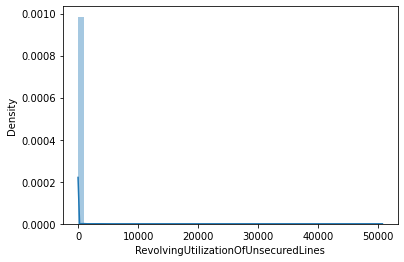

In [35]:
sns.distplot(df["RevolvingUtilizationOfUnsecuredLines"].dropna())

We will clearly benefit from removing the few outliers here as most of the data is clumped towards the left. 

In [36]:
df_ruul = outlier_removal(df, 'RevolvingUtilizationOfUnsecuredLines')

In [37]:
df_ruul["RevolvingUtilizationOfUnsecuredLines"].describe()

count    250940.000000
mean          0.321053
std           0.356741
min           0.000000
25%           0.029843
50%           0.152552
75%           0.556853
max           2.150330
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

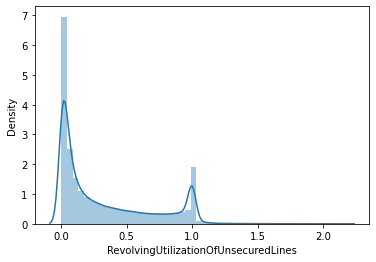

In [38]:
sns.distplot(df_ruul["RevolvingUtilizationOfUnsecuredLines"].dropna())

We can see that most members have a RUUL value under 0.5, which is a good sign. However there are a fair number of people who have a value close to and more than 1 as well. Banks might not feel too safe offering lines/loans to such members and it might be worth developing a certain RUUL threshold to accept future members.

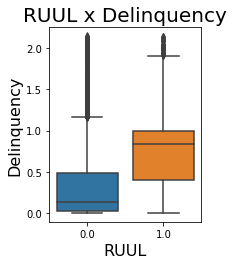

In [44]:
plt.subplot(122)
ax1 = sns.boxplot(x ="SeriousDlqin2yrs",y="RevolvingUtilizationOfUnsecuredLines", data=df_ruul)
ax1.set_title("RUUL x Delinquency", fontsize=20)
ax1.set_xlabel("RUUL", fontsize=16)
ax1.set_ylabel("Delinquency", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

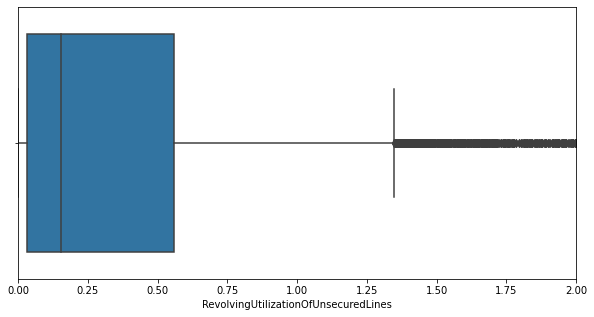

In [45]:
plt.figure(figsize=(10,5))
plt.xlim(0,2)
sns.boxplot(x=df_ruul['RevolvingUtilizationOfUnsecuredLines'])
plt.show()

We see that the population has a mean of roughly 0.321 and a median of roughly 0.153. This is a healthy sign and would be relevant when training ML algorithms to onboard new members. On average, delinquent clients have a greater RUUL compared to their non-delinquent counterparts, and this would probably explain their delinquency; the debt probably got too large to handle.

## Debt Ratio

Debt Ratio is defined as an individual's total debt divided by their total assets (Asset backed debt).  

In [46]:
df["DebtRatio"].describe()

count    251503.000000
mean        349.562468
std        1884.792016
min           0.000000
25%           0.174330
50%           0.365612
75%           0.861754
max      329664.000000
Name: DebtRatio, dtype: float64

In [47]:
(df['DebtRatio'] > 1).mean()

0.23345645976389945

On average, about 23% have a greater debt than their debt-backed assets. Ideally the Debt Ratio should be between 0 and 1, so this is a cause for concern. 



In [48]:
df_debt = outlier_removal(df, 'DebtRatio')

In [49]:
df_debt["DebtRatio"].describe()

count    200558.000000
mean          0.347394
std           0.325941
min           0.000000
25%           0.132593
50%           0.285792
75%           0.463952
max           2.923461
Name: DebtRatio, dtype: float64

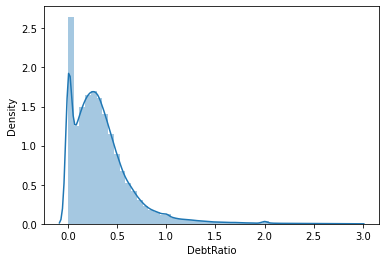

In [50]:
sns.distplot(df_debt["DebtRatio"].dropna())

A majority of the members have a Debt Ratio between 0 and 1, which is a positive. However, there are some members who have a Debt Ratio over 1, and this is a cause for concern.

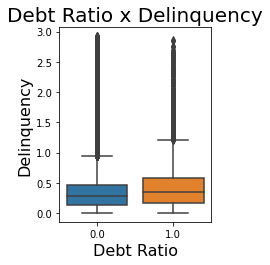

In [51]:
plt.subplot(122)
ax1 = sns.boxplot(x ="SeriousDlqin2yrs",y="DebtRatio", data=df_debt)
ax1.set_title("Debt Ratio x Delinquency", fontsize=20)
ax1.set_xlabel("Debt Ratio", fontsize=16)
ax1.set_ylabel("Delinquency", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

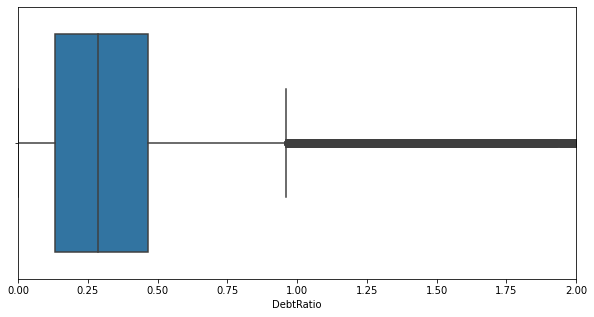

In [52]:
plt.figure(figsize=(10,5))
plt.xlim(0,2)
sns.boxplot(x=df_debt['DebtRatio'])
plt.show()

We can see a population mean of roughly 0.347, which is a healthy debt to asset ratio. A bank would certainly not favor working with someone with a ratio close to or over 1, so that certainly is a healthy sign. On the first box plot, we can clearly see a higher debt ratio on average for delinquent clients, and this probably explains why they were delinquent; the debt was too great for them to repay with their available assets.

## Monthly Income

Monthly income is fairly self-explanatory. It represents the monthly income of each of the bank's members.



In [53]:
df['MonthlyIncome'].describe()

count    2.016690e+05
mean     6.744818e+03
std      2.571761e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.212000e+03
max      7.727000e+06
Name: MonthlyIncome, dtype: float64

In [54]:
df_mi = outlier_removal(df, 'MonthlyIncome')

In [55]:
df_mi['MonthlyIncome'].describe()

count    199013.000000
mean       6102.121615
std        3820.660021
min           0.000000
25%        3383.000000
50%        5333.000000
75%        8033.000000
max       22600.000000
Name: MonthlyIncome, dtype: float64

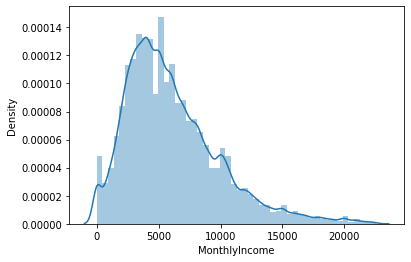

In [56]:
sns.distplot(df_mi["MonthlyIncome"].dropna())

Monthly Income peaks at roughly 4000, and we can see that most people are concentrated within the 3000-8000 range. This information will be particularly relevant for determining credit limits and these population metrics can be used to develop machine learning algorithms to automate credit limit allocation.

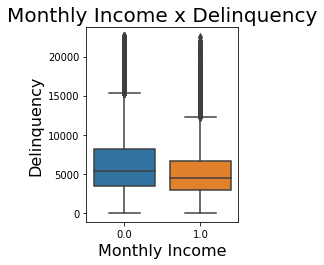

In [57]:
plt.subplot(122)
ax1 = sns.boxplot(x ="SeriousDlqin2yrs",y="MonthlyIncome", data=df_mi)
ax1.set_title("Monthly Income x Delinquency", fontsize=20)
ax1.set_xlabel("Monthly Income", fontsize=16)
ax1.set_ylabel("Delinquency", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

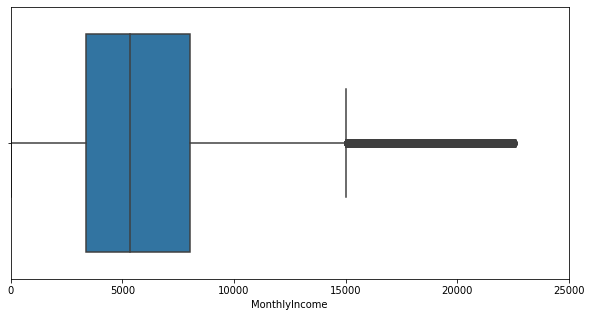

In [58]:
plt.figure(figsize=(10,5))
plt.xlim(0,25000)
sns.boxplot(x=df_mi['MonthlyIncome'])
plt.show()

The population has a mean of 6102. We have eliminated some extreme outliers to get a more visible analysis. The first graph shows us the individual box plots based on delinquency, and we can see a lower Monthly Income median for the delinquent members. It's quite possible that, due to a lower monthly income, these members find themselves unable to repay dues. 

# Conclusion

To conclude, we have investigated the relationship between loan default and all of the dataset's variables, and it's clear that some variables have a positive correlation with loan defaulting, especially those which measure a consumer's debt. The variables which measure income, dependents, open lines/loans appear to have a negative correlation with delinquency, and a greater value for these variables generally denotes a safer member to onboard to a bank. 

This analysis can be extrapolated to larger datasets and can be used as a basis for ML model development and training. The model can be fed the population values and a threshold can be set to onboard new members, and if the new members fail to meet the threshold for certain criteria, the model may recommend not onboarding them or flag them as risky. This is simply the tip of the iceberg, and there are endless possibilities to explore as a Data Scientist or Machine Learning Engineer.